# Pytorch Session 2: Linear regression

In [10]:
import torch
import numpy as np

## 2. Linear Regression 1D (using autograd):


Let us create the following expressions:


$b=-1,w=2$

$\hat{y}=wx+b$


First, define the parameters:


In [11]:
import torch
w0 = torch.tensor(2.0)
b0 = torch.tensor(-1.0)

In [12]:
xs=torch.tensor([1.5, 3.0, 2.7])
yhats = w0*xs+b0

## 2.1 Make some data

In [13]:
torch.manual_seed(2021)
X = torch.arange(-3,3, 0.3).view(-1, 1)
f = w0*X+b0
print(X.shape, f.shape)

torch.Size([20, 1]) torch.Size([20, 1])


In [14]:
X.reshape(-1)

tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

In [15]:
f.reshape(-1)

tensor([-7.0000, -6.4000, -5.8000, -5.2000, -4.6000, -4.0000, -3.4000, -2.8000,
        -2.2000, -1.6000, -1.0000, -0.4000,  0.2000,  0.8000,  1.4000,  2.0000,
         2.6000,  3.2000,  3.8000,  4.4000])

In [16]:
Y = f + torch.randn(f.shape)

In [17]:
Y.reshape(-1)

tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

In [18]:
X.shape
Y.shape

torch.Size([20, 1])

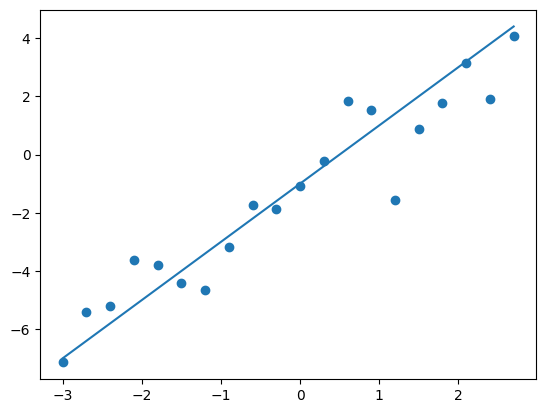

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X.numpy(),Y.numpy())
plt.plot(X.numpy(),f.numpy())

## 2.2 Create the model and cost function

You are given X and Y.

Your goal is to find the best linear model to explain the relation between X and Y by minimizing the following

$Loss(w, b)=\sum\limits_{i=1}^{n}(Y_i-Yhat_i)^2$

where

$Yhat_i:=X_i*w +b$.

In [20]:
def forward(x):
  return x*w+b

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

w = torch.tensor(10.0, requires_grad=True) # beta1
b = torch.tensor(10.0, requires_grad=True) # beta2

In [21]:
history=[]
lr=0.1
for epoch in range(100):
  Yhat = forward(X)
  loss = criterion(Yhat,Y)
  history.append(loss.item())
  loss.backward()
  w.data = w.data-lr*w.grad.data
  b.data = b.data-lr*b.grad.data
  w.grad.data.zero_() # w.grad = None
  b.grad.data.zero_() # b.grad = None




Now our goal is to find ```w``` and ```b``` which minimize ```loss``` function.

In [22]:
w

tensor(1.7149, requires_grad=True)

In [23]:
b

tensor(-1.1823, requires_grad=True)

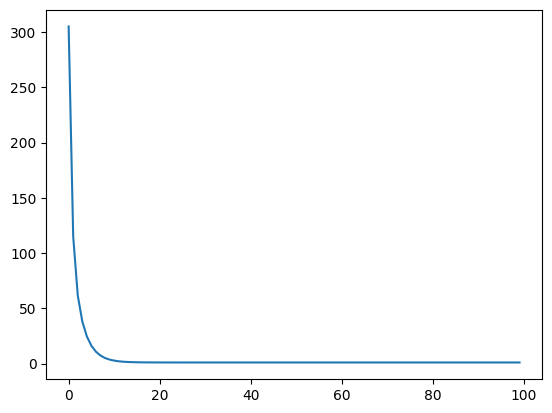

In [24]:
plt.plot(history)

# 3. Stochastic Gradient Descent (SGD) using Dataset and DataLoader

In [25]:
# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [26]:
dataset = TensorDataset(X,Y)

In [27]:
trainloader=DataLoader(dataset = dataset, batch_size=1, shuffle=True)

In [28]:
for i in trainloader:
  print(i)

[tensor([[2.4000]]), tensor([[1.8912]])]
[tensor([[-2.7000]]), tensor([[-5.4253]])]
[tensor([[-3.]]), tensor([[-7.1452]])]
[tensor([[0.6000]]), tensor([[1.8226]])]
[tensor([[-1.8000]]), tensor([[-3.8022]])]
[tensor([[-1.5000]]), tensor([[-4.4101]])]
[tensor([[1.2000]]), tensor([[-1.5535]])]
[tensor([[-2.3842e-08]]), tensor([[-1.0742]])]
[tensor([[0.9000]]), tensor([[1.5453]])]
[tensor([[1.8000]]), tensor([[1.7537]])]
[tensor([[-0.6000]]), tensor([[-1.7325]])]
[tensor([[-2.4000]]), tensor([[-5.1977]])]
[tensor([[-2.1000]]), tensor([[-3.6225]])]
[tensor([[1.5000]]), tensor([[0.8857]])]
[tensor([[-0.3000]]), tensor([[-1.8879]])]
[tensor([[0.3000]]), tensor([[-0.2320]])]
[tensor([[2.1000]]), tensor([[3.1607]])]
[tensor([[-1.2000]]), tensor([[-4.6622]])]
[tensor([[-0.9000]]), tensor([[-3.1932]])]
[tensor([[2.7000]]), tensor([[4.0895]])]


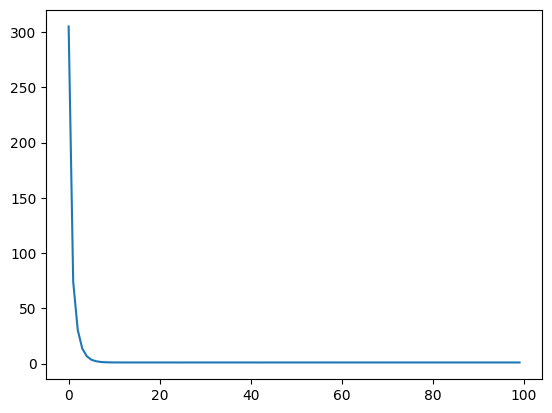

In [29]:
w = torch.tensor(10.0, requires_grad=True)  # beta1
b = torch.tensor(10.0, requires_grad=True)  # beta2
def forward(x):
  return x*w+b

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)  # MSE (Mean Squared Error)

epochs=100
lr=0.01
history=[]
for epoch in range(epochs):
  Yhat = forward(X)
  epoch_loss = criterion(Yhat, Y)
  history.append(epoch_loss.item())  # MSE 계산 값을 history에 append
  for xx,yy in trainloader:
    yhat = forward(xx)
    loss = criterion(yhat, yy)  # criterion = loss = MSE 의 min을 찾는 과정
    loss.backward()
    w.data = w.data - lr*w.grad.data  # MSE를 작게하는 w(beta1)를 찾아나감
    b.data = b.data - lr*b.grad.data  # MSE를 작게하는 b(beta2)를 찾아나감
    w.grad.data.zero_()  # w.grad = None
    b.grad.data.zero_()  # b.grad = None

plt.plot(history)


In [30]:
print(w,b)

tensor(1.7383, requires_grad=True) tensor(-1.1583, requires_grad=True)


## Exercise:

Repeat the above procedure with

   1> batch size equals 5
   
   2> XX[i, :]=torch.tensor([1.0, X[i]]) without using the intercept.

tensor([[-0.8078],
        [ 2.0247]])

# 4. Stochastic Gradient Descent (SGD) using Pytorch functions



In [7]:
from torch import nn, optim

In [32]:
temp = nn.Linear(2,1)

In [38]:
list(temp.parameters())


[Parameter containing:
 tensor([[0.6604, 0.6402]], requires_grad=True),
 Parameter containing:
 tensor([0.1774], requires_grad=True)]

In [40]:
temp.state_dict()

OrderedDict([('weight', tensor([[0.6604, 0.6402]])),
             ('bias', tensor([0.1774]))])

In [45]:
temp.weight

Parameter containing:
tensor([[0.6604, 0.6402]], requires_grad=True)

In [44]:
temp.weight.data

tensor([[0.6604, 0.6402]])

In [43]:
temp.weight.grad

In [ ]:
print(temp.weight, temp.bias)



Parameter containing:
tensor([[ 0.6384, -0.0754]], requires_grad=True) Parameter containing:
tensor([-0.2360], requires_grad=True)


Now, we obtain

$Z = \left(
  \begin{array}{cc}
    2.0 & 1.0 \\
    1.0 & -1.0 \\
  \end{array}
\right)$

and calculate

$\widehat{Y}=Z\, W^T +b$

In [ ]:
Z = torch.tensor([[2.0, 1.0],
                         [1.0, -1.0]])
print(temp(Z))

tensor([[0.9655],
        [0.4779]], grad_fn=<AddmmBackward0>)


In [ ]:
Z @ temp.weight.T +temp.bias

tensor([[0.9655],
        [0.4779]], grad_fn=<AddBackward0>)

In [ ]:
for i in temp.parameters():
  print(i)

Parameter containing:
tensor([[ 0.6384, -0.0754]], requires_grad=True)
Parameter containing:
tensor([-0.2360], requires_grad=True)


In [ ]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)
model = nn.Linear(1,1)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
dataset.tensors[0]

tensor([[-3.0000e+00],
        [-2.9000e+00],
        [-2.8000e+00],
        [-2.7000e+00],
        [-2.6000e+00],
        [-2.5000e+00],
        [-2.4000e+00],
        [-2.3000e+00],
        [-2.2000e+00],
        [-2.1000e+00],
        [-2.0000e+00],
        [-1.9000e+00],
        [-1.8000e+00],
        [-1.7000e+00],
        [-1.6000e+00],
        [-1.5000e+00],
        [-1.4000e+00],
        [-1.3000e+00],
        [-1.2000e+00],
        [-1.1000e+00],
        [-1.0000e+00],
        [-9.0000e-01],
        [-8.0000e-01],
        [-7.0000e-01],
        [-6.0000e-01],
        [-5.0000e-01],
        [-4.0000e-01],
        [-3.0000e-01],
        [-2.0000e-01],
        [-1.0000e-01],
        [-2.3842e-08],
        [ 1.0000e-01],
        [ 2.0000e-01],
        [ 3.0000e-01],
        [ 4.0000e-01],
        [ 5.0000e-01],
        [ 6.0000e-01],
        [ 7.0000e-01],
        [ 8.0000e-01],
        [ 9.0000e-01],
        [ 1.0000e+00],
        [ 1.1000e+00],
        [ 1.2000e+00],
        [ 1

In [ ]:
dir(dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'tensors']

In [ ]:
iters = 30
history = []
for epoch in range(iters):
  Yhat = model(dataset.tensors[0])
  LOSS = criterion(Yhat, dataset.tensors[1])
  history.append(LOSS.item())
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


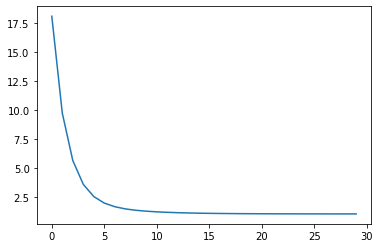

In [ ]:
plt.plot(history)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[2.0379]], requires_grad=True), Parameter containing:
 tensor([-0.7708], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([[2.0379]])), ('bias', tensor([-0.7708]))])

In [39]:
model.weight

NameError: ignored

### Exercise:

1.   Calculate MSE (mean squared error).
1.   Calculate MAE (mean absolute error).
2.   Assume that you are given ```x=1```. What woud be your yhat?






#5. Custom layer

Repeat the above procedure with user defined layer.

In [ ]:
nn.Linear?

## 5.1 Using torch.nn module

In [1]:
import torch
import numpy as np

In [8]:
class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    yhat = self.linear(x)
    return yhat

In [9]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)
model = linear_regression(1,1)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

NameError: ignored

In [ ]:
iters = 30
history = []
for epoch in range(iters):
  Yhat = model(dataset.tensors[0])
  LOSS = criterion(Yhat, dataset.tensors[1])
  history.append(LOSS.item())
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


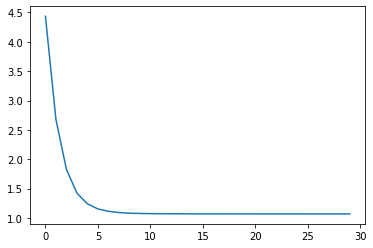

In [ ]:
plt.plot(history)

## 5.2 Defining the parameters and model directly.

In [ ]:
class my_linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(my_linear_regression, self).__init__()
    self.w = nn.Parameter(torch.randn(1,1), requires_grad=True)
    self.b = nn.Parameter(torch.randn(1), requires_grad=True)
  def forward(self,x):
    yhat = x @ self.w.T +b
    return yhat

In [ ]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)
model = my_linear_regression(1,1)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
iters = 30
history = []
for epoch in range(iters):
  Yhat = model(dataset.tensors[0])
  LOSS = criterion(Yhat, dataset.tensors[1])
  history.append(LOSS.item())
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


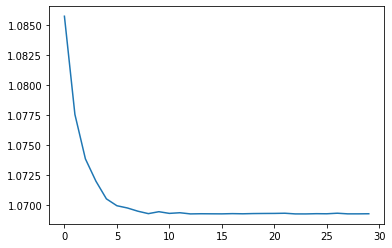

In [ ]:
plt.plot(history)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[2.0349]], requires_grad=True), Parameter containing:
 tensor([1.4787], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('w', tensor([[2.0349]])), ('b', tensor([1.4787]))])

## Exercise:

By using the following command,

```
self.linear = nn.Linear(input_size, output_size, bias=False)
```

you obtain the linear layer without a bias. Then, you want to add a bias `b` manually in your customed layer. Train the model.

## Exercise:

By using the following command,

```
self.linear = nn.Linear(input_size, output_size, bias=False)
```

you obtain the linear (customed) layer without a bias. Then, you want to add a bias `b` manually in outside of the customed layer. Train the model.

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
dataset = TensorDataset(X,Y)

In [ ]:
trainloader=DataLoader(dataset = dataset, batch_size=1, shuffle=True)

In [ ]:
class my_linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(my_linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size, bias=False)
  def forward(self,x):
    yhat = self.linear(x)
    return yhat


In [ ]:
import itertools

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0575]], requires_grad=True), Parameter containing:
 tensor([0.9956], requires_grad=True)]

In [ ]:
list(b)

[tensor(-0.4045, grad_fn=<UnbindBackward0>)]

In [ ]:
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)
model = my_linear_regression(1,1)
b = nn.Parameter(torch.randn(1), requires_grad=True)
all_params = list(model.parameters())+list([b])
#itertools.chain(model.parameters(), b)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = optim.SGD(all_params, lr=0.001)

In [ ]:
iters = 500
history = []
for epoch in range(iters):
  Yhat = model(dataset.tensors[0])
  LOSS = criterion(Yhat, dataset.tensors[1])
  history.append(LOSS.item())
  for x,y in trainloader:
    yhat = model(x)+b
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


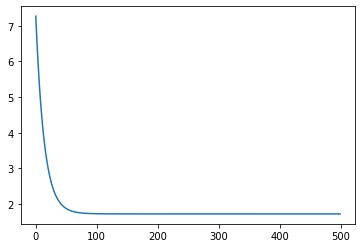

In [ ]:
plt.plot(history)

In [ ]:
b

Parameter containing:
tensor([-0.8063], requires_grad=True)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[2.0346]], requires_grad=True)]

In [ ]:
model(torch.tensor([[2.5000]]))+b #4.88

tensor([[4.2803]], grad_fn=<AddBackward0>)

In [ ]:
x[:1]

tensor([[-0.2000]])

In [ ]:
-1.32/2

-0.66